# <center>Détecter des faux billets avec Python

**Scénario :**<p>
Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).<p>
Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.

---

**Compétences évaluées :**<p>

- Opérer des classifications automatiques pour partitionner les données :<p>
    - ACP/K-means<p>
- Réaliser une régression logistique :<p>
    - Construire un algorithme capable de prendre en entrée un fichier contenant les dimensions de plusieurs billets,et de déterminer le type de chacun d’entre eux (vrais/faux)<p>
- Réaliser une régression linéaire multiple :<p>
    - Prédire les valeurs manquantes en fonction de toutes les autres variables<p>
- Réaliser une analyse prédictive<p>

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from functions import *

In [3]:
styles = [dict(selector="caption", props=[("font-size", "125%"),("font-weight", "bold")])]

In [4]:
data = pd.read_csv('billets.csv',sep=';')

In [5]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
#taille des données

print('Dataframe shape',data.shape)

Dataframe shape (1500, 7)


1500 billets décrits par 7 variables<p>
6 variables géométriques et 1 variable sur la nature du billet 

In [7]:
# Recherche  de valeurs manquantes
print("Recherche  de valeurs manquantes")
data.isnull().sum()

Recherche  de valeurs manquantes


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

il y a 37 valeurs manquantes dans la variable "margin_low"

In [8]:
#affichage de quelques lignes contenant des NaN
data[~data.notnull().all(1)].head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


### Régression linéaire multiple

Prédire la valeur de margin_low en fonction de toutes les autres variables géométriques

In [9]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t, shapiro
from functions_RL import *

In [10]:
#Régression de  'margin_low' en fonction des autres variables .

reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.60e-202
Time:                        12:38:50   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Aucune variables non significatives a retirer, tous les paramètres sont significatifs car leur p-valeur sont inférieure à 5 %

Le $R^{2}$ ( coefficient de détermination) : 47.7% la mesure de la part de la variable indépendante expliquée par les changements dans nos variables dépendantes. Compris entre 0 et 1 (0.477 est assez faible)

In [11]:
#valeurs manquantes
data[~data.notnull().all(1)].head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [12]:
#test =>utiliser le modèle à des fins de prévision(prévoir margin_low pour l'index 72)

a_prevoir = pd.DataFrame({'diagonal': 171.94, 'height_left': 103.89, 'height_right': 103.45, 'margin_up': 3.25, 'length': 112.79}, index=[0])
margin_low_prev = reg_multi.predict(a_prevoir)
print(round(margin_low_prev[0], 2))

4.32


In [13]:
#vérification de la colinéarité des variables

variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686344,
 1.138260573608252,
 1.230114515556036,
 1.4044037781843624,
 1.5769501453665817]

>Le variance inflation factor(VIF) estime de combien la variance d’un coefficient est "augmentée" en raison d’une relation linéaire avec d’autres prédicteurs.<p>
>Un facteur d'influence de la variance(VIF) dont la valeur serait supérieurs a 10 indiquerait un éventuel problème de colinéarité.<p>
>Tous les coefficients étant inférieurs à 10, il n'y a donc pas de problème de colinéarité (nos variables sont non colinéaires entres elles).

In [14]:
#tester l’homoscédasticité (la constance de la variance) des résidus 

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)
if pval > 0.05:
    print('H0 : Les résidus sont distribués avec une variance constante (homoscédasticité)')
else:
    print('H1 : Les résidus ne sont pas distribués avec une variance constante (hétéroscédasticité)')

p value test Breusch Pagan: 7.759535216174283e-16
H1 : Les résidus ne sont pas distribués avec une variance constante (hétéroscédasticité)


In [15]:
#tester la normalité des résidus avec un test de Shapiro-Wilk.

stat, p = shapiro(reg_multi.resid)
print('stat=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print('La distribution observée est compatible avec une distribution théorique normale')
else:
    print('La distribution observée n\'est pas compatible avec la loi normale')

stat=0.986, p-value=0.000
La distribution observée n'est pas compatible avec la loi normale


#### Vérification avec une sélection automatique de type  backward.

   1. on commence par un modèle qui contient toutes les variables considérées,
   1. ensuite, on commence à enlever les variables les moins significatives l'une après l'autre,
   1. jusqu'à ce qu'il ne reste plus de variable dans le modèle.

In [16]:
columns = ['diagonal','height_left','height_right','margin_low','margin_up','length']
reg_backward = backward_selected(data[columns], 'margin_low')

_______________________________
margin_low ~ height_right + length + height_left + margin_up + diagonal + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.60e-202
Time:                        12:38:50   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]

>Aucune variable a enlever, le modèle avec toutes les variables est le bon

In [17]:
#valeur manquantes
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [18]:
# utiliser le modèle de regression linéaire multiple pour prédire les valeurs manquantes (37 prédictions)
a_prevoir=data[~data.notnull().all(1)]
margin_low_prev = reg_multi.predict(a_prevoir)
margin_low_prev

72      4.318525
99      4.393668
151     4.410457
197     4.319014
241     4.650617
251     3.803308
284     4.179736
334     4.127442
410     4.135034
413     4.160539
445     4.177420
481     3.768554
505     4.058764
611     4.298047
654     4.160607
675     4.094065
710     4.439846
739     4.470650
742     4.341643
780     4.080414
798     3.614306
844     4.371811
845     4.093621
871     4.249629
895     3.893748
919     3.746333
945     4.237415
946     4.710533
981     4.137780
1076    5.050277
1121    4.802145
1176    5.067584
1303    5.047570
1315    4.778967
1347    5.726993
1435    5.185862
1438    5.140043
dtype: float64

In [19]:
#remplacer les valeurs manquantes dans la colonnes 'margin_low' avec les valeurs prédites
data['margin_low'].fillna(round(margin_low_prev,2) , inplace=True)

In [20]:
#vérification
data.loc[[72,99,151,197,241]]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.32,3.25,112.79
99,True,171.93,104.07,104.18,4.39,3.14,113.08
151,True,172.07,103.80,104.38,4.41,3.02,112.93
197,True,171.45,103.66,103.80,4.32,3.62,113.27
241,True,171.83,104.14,104.06,4.65,3.02,112.36


In [21]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

#### Analyse bivariée

In [22]:
#nombre de vrai/faux bilelts

true = len(data.query('[True] in is_genuine'))
false = len(data.query('[False] in is_genuine'))
fraud_percent = (false / (false + true)) * 100
print("Nombre de vrais billets : ", true)
print("Nombre de faux billets : ", false)
print("Pourcentage de faux: {:.4f}".format(fraud_percent))

Nombre de vrais billets :  1000
Nombre de faux billets :  500
Pourcentage de faux: 33.3333


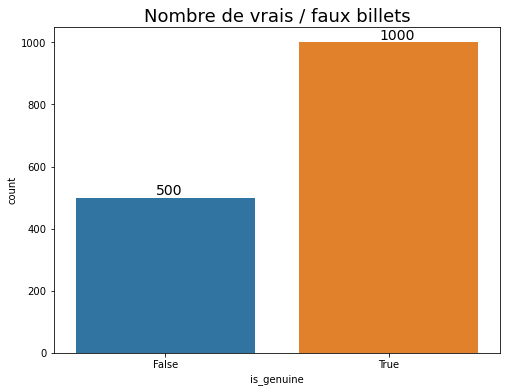

In [23]:
#nombre de vrai/faux billets

plt.figure(figsize=(8,6))
plt.title('Nombre de vrais / faux billets', size=18)
sb.countplot(x=data['is_genuine'])
target_count = data.is_genuine.value_counts()
plt.annotate(target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.savefig("Nombre de vrais faux billets.png", bbox_inches='tight')
plt.show()

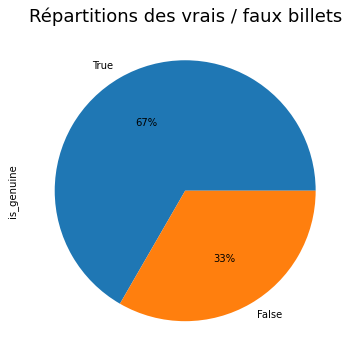

In [24]:
#pourcentage de vrai/faux billets
plt.figure(figsize=(8,6))
plt.title("Répartitions des vrais / faux billets", size=18)
data['is_genuine'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.savefig("Répartitions de vrais  faux billets.png", bbox_inches='tight')
plt.show()

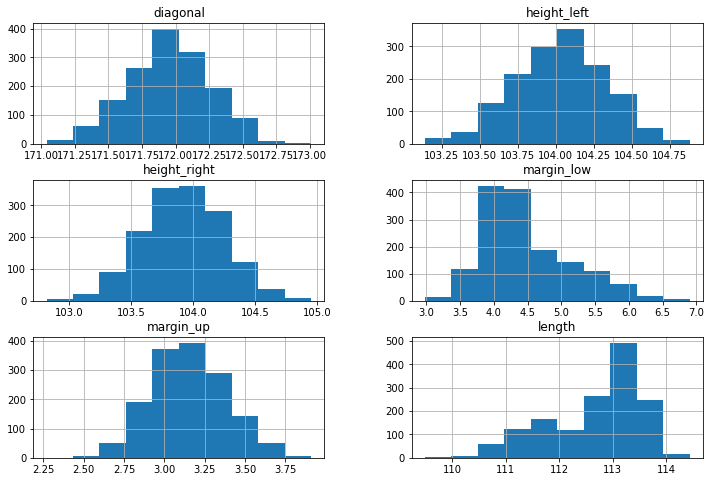

In [25]:
#distibution des données
data.hist(figsize=(12,8))
plt.savefig("distibution.png")
plt.show()

La distribution des variables diagonal / height_left / height_right semble suivre une loi normale.

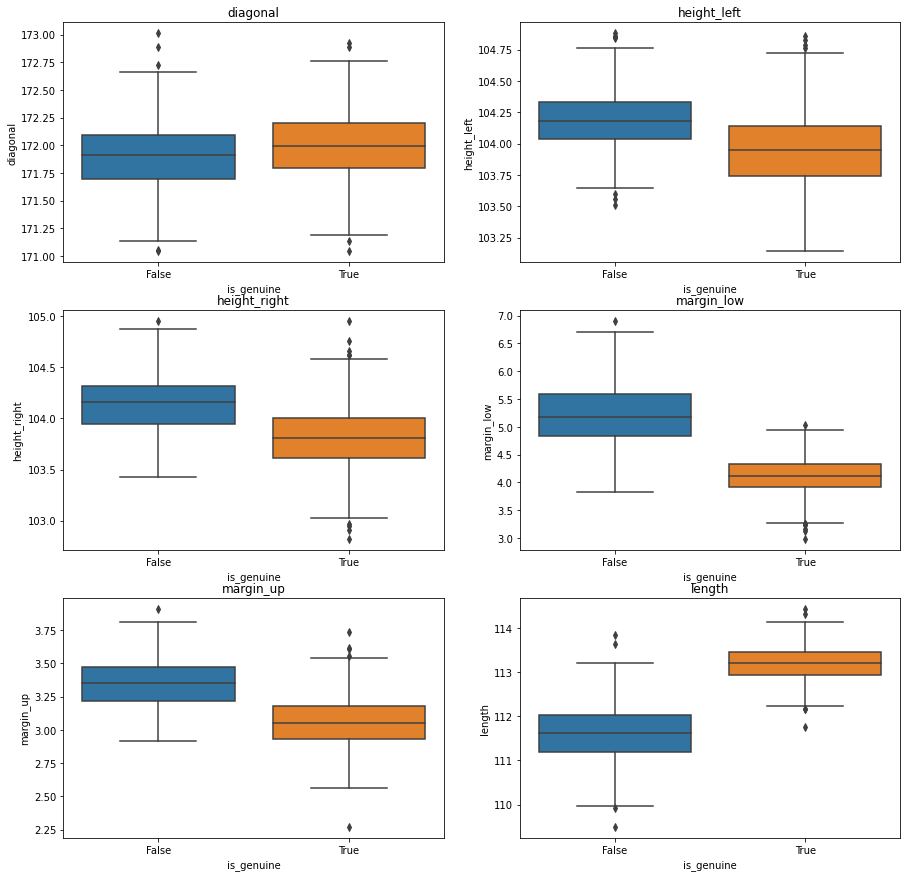

In [26]:
#Boxplot : Comparaison visuelle des variables en fonction de la  nature des billets
plt.figure(figsize=(15, 15))

plt.subplot(321)
sb.boxplot(data=data, x='is_genuine', y='diagonal').set_title('diagonal')

plt.subplot(322)
sb.boxplot(data=data, x='is_genuine', y='height_left').set_title('height_left')

plt.subplot(323)
sb.boxplot(data=data, x='is_genuine', y='height_right').set_title('height_right')

plt.subplot(324)
sb.boxplot(data=data, x='is_genuine', y='margin_low').set_title('margin_low')

plt.subplot(325)
sb.boxplot(data=data, x='is_genuine', y='margin_up').set_title('margin_up')

plt.subplot(326)
sb.boxplot(data=data, x='is_genuine', y='length').set_title('length')

plt.savefig("Boxplot.png")
plt.show(block=False)

>Des dimensions plus élevées pour les faux billets , sauf pours les variables diagonal et length.<p>
>Pour margin low toutes les dimension des vrais billets sont inférieures a la médiane des faux billets.<p>
>Pour length toutes les dimensions des vrais billets sont supérieures au troisième quartile des faux billets.<p>

In [27]:
#analyse par les moyennes
data.groupby('is_genuine').mean().style.highlight_max().format(precision=2).set_caption("Analyse par les moyennes").set_table_styles(styles)

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90,104.19,104.14,5.21,3.35,111.63
True,171.99,103.95,103.81,4.12,3.05,113.20


## ACP

In [28]:
from sklearn import preprocessing
from sklearn import decomposition

In [29]:

data_acp = data

In [30]:
#remplacer l'index pour n'avoir que des variables quantitatives
data_acp.set_index('is_genuine',inplace=True)

In [31]:
#Préparation des données pour l'ACP

X = data_acp.values

In [32]:
#Centrage / réduction des données

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [33]:
#Calcul des composantes principales (coordonées des individus sur les axes de rang)
pca = decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

PCA(svd_solver='full')

In [34]:
#Pourcentage de variance expliquée par les composantes principales
print(pca.explained_variance_ratio_)

[0.43288388 0.16956551 0.1302509  0.11824957 0.09602798 0.05302216]


La première composante explique environ 43% de la variance observée dans les données, la deuxième explique 17%.<p>
Les 2 premières composantes principales expliquent 60% de la variance.

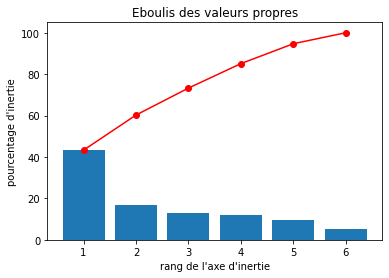

In [35]:
# Eboulis des valeurs propres
display_scree_plot(pca)

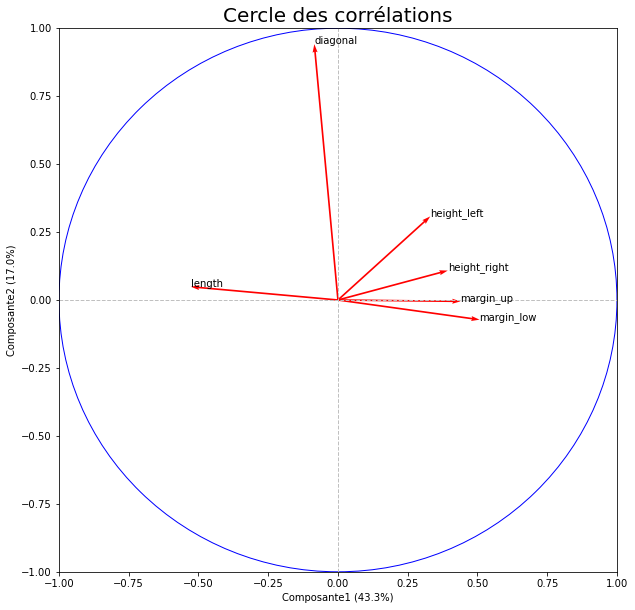

In [36]:
#Cercle des corrélations de nos variables
pcs = pca.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

#Ajout des flèches
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, data_acp.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('Composante{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('Composante{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("Cercle des corrélations.png")
plt.show()

> les variables qui contribuent le plus a l'axe 1 sont margin_low (positivement) et length (négativement)<p>
> La variable diagonal est très bien représentée et contribue fortement de manière positive à l'axe 2

In [37]:
# choix du nombre de composantes à calculer
n_comp = 2

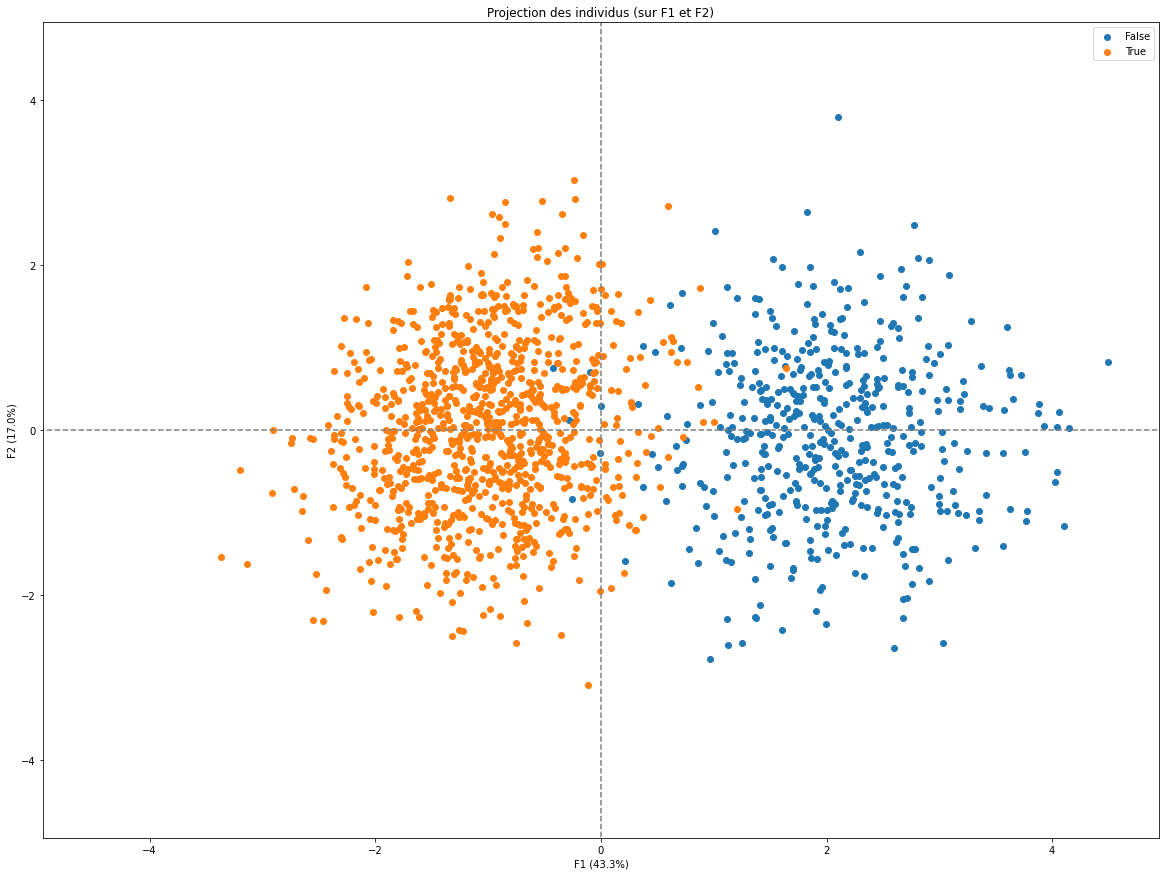

In [38]:
#projection des  individus sur le 1er plan factoriel
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],  illustrative_var= data_acp.index)

plt.show()

L'acp distingue bien les 2 groupes True/False mais quelques points pose probleme.

## Mise en place du K-means

Maintenant, nous allons utiliser l'algorithme d'apprentissage non supervisé K-Means pour trouver des clusters dans l'ensemble de données sans utiliser la colonne de contrefaçon pour voir s'il sera capable de bien séparer l'ensemble de données en deux clusters.

In [39]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import cluster, metrics

In [40]:
# Nombre de clusters souhaités
n_clust = 2

In [41]:
# ne pas garder la colonne is_genuine
data_k = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour le clustering
X = data_k.values

In [42]:
#Centrage / réduction des données

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

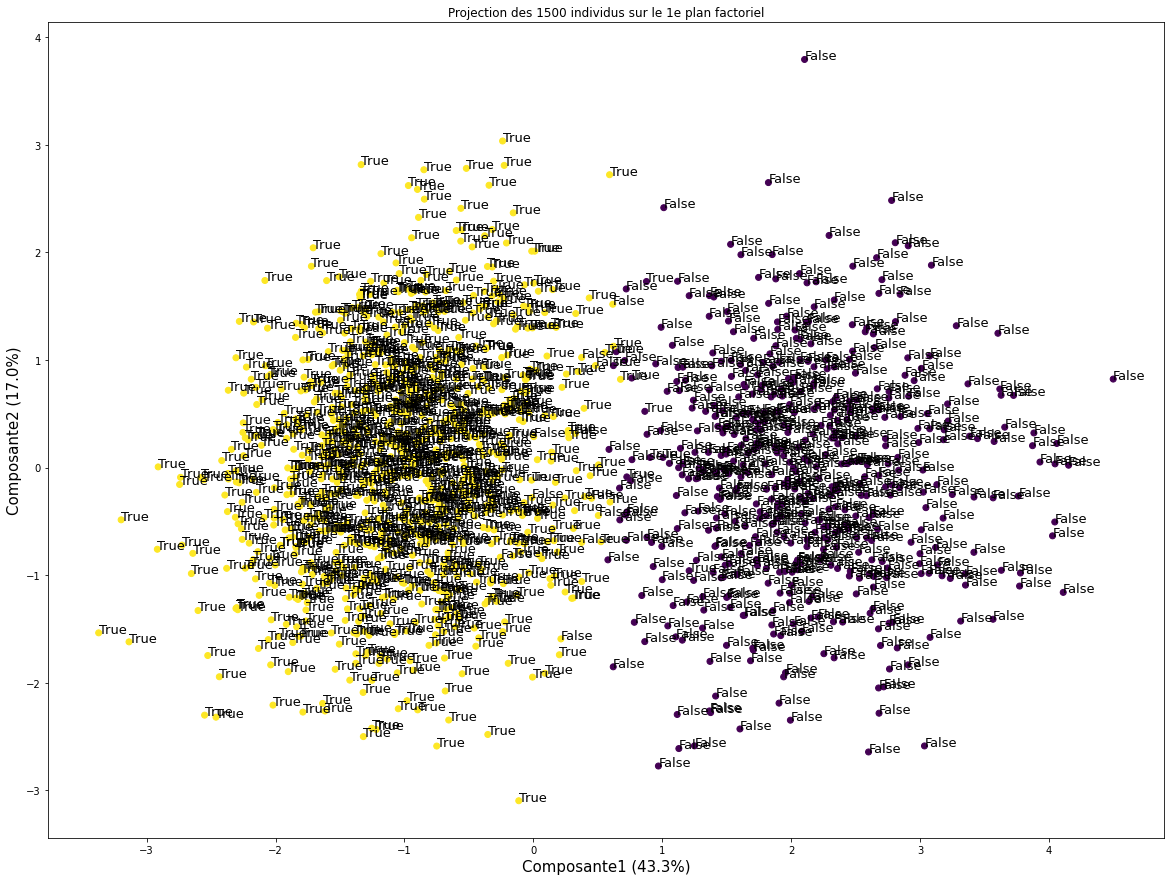

In [43]:
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)
y_kmeans2 = km.predict(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

plt.figure(figsize=(20, 15))

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_kmeans2 )
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, data.index[i], fontsize='13') 


plt.xlabel('Composante{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('Composante{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.savefig("KMeans_projection3.png", bbox_inches='tight')
plt.show(block=False)

In [44]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans2 = km.labels_

In [45]:
#Comparaison des clusters par les centroïdes (« centre » des clusters) (caractéristique moyenne du groupe)

centroids = km.cluster_centers_
df_centroides = pd.DataFrame(centroids, columns=data.columns)
df_centroides.style.set_caption("Centroïdes des classes").format(precision=2).highlight_max()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.19,0.57,0.71,1.12,0.86,-1.20
1,0.10,-0.28,-0.35,-0.55,-0.43,0.59


In [46]:
print("Matrice de confusion K-means")
mc_k = pd.crosstab(data_k.index,clusters)
mc_k.index = ['Cluster 0','Cluster 1']
mc_k.columns = ['Faux','Vrais']
mc_k

Matrice de confusion K-means


,Faux,Vrais
Cluster 0,486,14
Cluster 1,10,990


In [47]:
print("Modèle K-means")
print(" ")
print("Nombre de faux positifs = ",'14')
print("Nombre de faux négatifs = ",'10')
print("Taux d'erreur = ",round((24/1500)*100,6),'%')
print("Taux de succès = ",round((990+486)/1500*100,6),'%')
print("Sensibilité = ",round((990/(990+10))*100,6),'%')
print("Précision =  ",round((990/(990+14))*100,6),'%')
print("Spécificité = ",round((486/(14+486))*100,6),'%')

Modèle K-means
 
Nombre de faux positifs =  14
Nombre de faux négatifs =  10
Taux d'erreur =  1.6 %
Taux de succès =  98.4 %
Sensibilité =  99.0 %
Précision =   98.605578 %
Spécificité =  97.2 %


Le taux d'erreur est égal au nombre de mauvais classement rapporté à l'effectif total.<p>
Le taux de succès correspond à la probabilité de bon classement du modèle.<p>
La sensibilité (ou le rappel, ou encore le taux de vrais positifs [TVP] ) indique la capacité du modèle à retrouver les positifs.<p>
La précision indique la proportion de vrais positifs parmi les individus qui ont été classés positifs.<p>
La spécificité, à l'inverse de la sensibilité, indique la proportion de négatifs détectés.<p>

# Régression logistique

Classification supervisée => modeliser une variable qualitative/label/target (y) par des variables explicatives/features (x)<p>
y peut prendre 2 valeurs / True False

In [48]:
#importation de la classe de calcul
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score,confusion_matrix,plot_confusion_matrix, roc_auc_score, roc_curve

### Modele 1

In [49]:

data_lr=data.reset_index()

In [50]:
#Selection des variables pour le modèle 1
features=['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']

In [51]:
#les variables explicatives sont stockées dans x
X=data[features]

In [52]:
#la cible est stockée dans y
y = data_lr['is_genuine']

In [53]:
#séparer le jeu de données en training set et testing set (80 % de données d'entraînement et 20 % de données de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [54]:
#création du model
logistic_1 = LogisticRegression()

In [55]:
#entrainer le model sur les données X_train,y_train
logistic_1.fit(X_train,y_train)

LogisticRegression()

In [56]:
#affichage des coefficients
print(pd.DataFrame({"var":features,"coef":logistic_1.coef_ [0]}))

            var      coef
0      diagonal -0.374089
1   height_left -1.389893
2  height_right -1.838564
3    margin_low -3.596637
4     margin_up -2.962667
5        length  3.790270


In [57]:
#Obtenir les prédictions de notre modèle
y_pred = logistic_1.predict(X_test)

In [58]:
probabilites = logistic_1.predict_proba(X_test)

In [59]:
#1ère colonne proba que ce soit faux, 2ème colonne vrai
#affichage des 5 premières valeurs
print(probabilites [:5,:])

[[1.87896585e-02 9.81210341e-01]
 [2.20833653e-03 9.97791663e-01]
 [8.89487636e-03 9.91105124e-01]
 [3.08517236e-04 9.99691483e-01]
 [9.78429752e-01 2.15702482e-02]]


In [60]:
#rapport sur la qualité de prédiction
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       111
        True       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [61]:
#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred))

[[110   1]
 [  1 188]]


In [62]:
#taux d'erreur test/pred

print("Taux d'erreur de ",round((4/300)*100,2),'%')

Taux d'erreur de  1.33 %


In [63]:
##taux de precision test/pred
accuracy_score(y_test,y_pred)

0.9933333333333333

In [64]:
#évaluer la précision du modèle avec la méthode de score
logistic_1.score(X,y)

0.9893333333333333

In [65]:
#utiliser le modèle
logistic_1.predict(X)

array([False,  True,  True, ..., False, False, False])

In [66]:
#mettre les prédictions dans une colonne
data_lr['prediction']=logistic_1.predict(X)

In [67]:
print("Matrice de confusion logistic_1")
pd.crosstab(data_lr['is_genuine'],data_lr['prediction'])

Matrice de confusion logistic_1


prediction,False,True
is_genuine,,
False,490,10
True,6,994


In [68]:
print("Modèle logistic_1")
print(" ")
print("Nombre de faux positifs = ",'9')
print("Nombre de faux négatifs = ",'6')
print("Taux d'erreur = ",round(((9+6)/1500)*100,2),'%')
print("Taux de succès = ",round((994+491)/1500*100,2),'%')
print("Sensibilité = ",round((994/(997+6))*100,2),'%')
print("Précision =  ",round((994/(994+9))*100,2),'%')
print("Spécificité = ",round((491/(6+491))*100,2),'%')

Modèle logistic_1
 
Nombre de faux positifs =  9
Nombre de faux négatifs =  6
Taux d'erreur =  1.0 %
Taux de succès =  99.0 %
Sensibilité =  99.1 %
Précision =   99.1 %
Spécificité =  98.79 %


In [69]:
#rapport sur la qualité de prédiction
print("logistic_1")
print(metrics.classification_report(data_lr['is_genuine'],data_lr['prediction']))
print("Accuracy :",round(accuracy_score(data_lr['is_genuine'],data_lr['prediction']),6)*100,"%")
print("Precision :",round(precision_score(data_lr['is_genuine'],data_lr['prediction']),6)*100,"%")

logistic_1
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       500
        True       0.99      0.99      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

Accuracy : 98.9333 %
Precision : 99.004 %


In [70]:
#taux d'erreur 
print("Taux d'erreur de ",round((14/1500)*100,2),'%')

Taux d'erreur de  0.93 %


In [71]:
#performance du modele (exactitude , nombre totale d'observation correctement predite)
accuracy_score(data_lr['is_genuine'],data_lr['prediction'])

0.9893333333333333

L'exactitude désigne la proximité d'une mesure par rapport à la valeur réelle ou acceptée.

In [72]:
#Calculer la précision du modèle
precision_score(data_lr['is_genuine'],data_lr['prediction'])

0.9900398406374502

La précision fait référence à la proximité des mesures d'un même élément les unes par rapport aux autres.<p>
La précision est la capacité du classificateur à ne pas étiqueter comme positif un échantillon qui est négatif.<p>
La précision est le rapport vp / (vp + fp) où tvp est le nombre de vrais positifs et fp le nombre de faux positifs.<p>
La meilleure valeur est 1 et la pire valeur est 0.

Le modèle 1 est excacte et précis

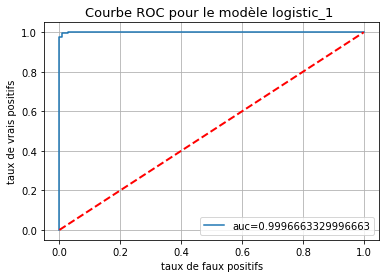

In [73]:
#Affichage de la courbe de ROC (Receiver Operating Characteristic) et de son indice AUC (Area Under the Curve)

y_pred_proba = logistic_1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_1 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_1))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
plt.ylabel('taux de vrais positifs')
plt.xlabel('taux de faux positifs')
plt.title('Courbe ROC pour le modèle logistic_1 ', fontsize=13)
plt.grid()
plt.legend(loc=4)
plt.savefig("ROC_1.png", bbox_inches='tight')
plt.show()

Pour un modèle idéal, on a AUC=1.<p>
Notre modèle ayant une AUC supérieure à 0.99 est excellent.

In [74]:
#class_report_1 = metrics.classification_report(data_lr['is_genuine'],data_lr['prediction'])
#conf_matrix_1 = confusion_matrix(data_lr['is_genuine'],data_lr['prediction'])
acc_1 = accuracy_score(data_lr['is_genuine'],data_lr['prediction'])

In [75]:
results = []
#results.append(("logistic_1",class_report_1, conf_matrix_1, acc_1))
results.append(("logistic_1",acc_1,auc_1))

### Modele 2

In [76]:
data_lr_2=data.reset_index()

In [77]:
##Sélection des variables pour le modèle 2 (sans la variable 'height_right')
features_2= ['diagonal', 'height_left', 'margin_low','margin_up', 'length']

In [78]:
#les variables explicatives sont stockées dans x
X=data_lr_2[features_2]

In [79]:
#la cible est stockée dans y
y = data_lr_2['is_genuine']

In [80]:
#séparer le jeu de données en training set et testing set (80 % de données d'entraînement et 20 % de données de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [81]:
#création du model
logistic_2 = LogisticRegression()

In [82]:
#entrainer le model sur les données X_train,y_train
logistic_2.fit(X_train,y_train)

LogisticRegression()

In [83]:
#affichage des coefficients de notre équation
print(pd.DataFrame({"var":features_2,"coef":logistic_2.coef_ [0]}))

           var      coef
0     diagonal -0.840165
1  height_left -2.336816
2   margin_low -3.700417
3    margin_up -3.628286
4       length  3.702631


In [84]:
#coeff supplémentaire 
logistic_2.intercept_

array([-0.03770678])

In [85]:
y_pred = logistic_2.predict(X_test)

In [86]:
probabilites_2 = logistic_2.predict_proba(X_test)

In [87]:
#1ère colonne proba que ce soit faux, 2ème colonne vrai
#affichage des 5 premières valeurs
print(probabilites_2 [:5,:])

[[9.98259821e-01 1.74017929e-03]
 [8.89183420e-04 9.99110817e-01]
 [7.85991630e-02 9.21400837e-01]
 [2.22640293e-03 9.97773597e-01]
 [9.05054525e-01 9.49454748e-02]]


In [88]:
#rapport sur la qualité de prédiction
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        94
        True       1.00      1.00      1.00       206

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [89]:
#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred))

[[ 93   1]
 [  0 206]]


In [90]:
#taux d'erreur
print("Taux d'erreur de ",round((1/300)*100,2),'%')

Taux d'erreur de  0.33 %


In [91]:
##taux de precision 
accuracy_score(y_test,y_pred)

0.9966666666666667

In [92]:
#évaluer le model (coéfficient de détermination R carré )
logistic_2.score(X,y)

0.99

In [93]:
#création d'une colonne avec les resultat de la regréssion logistique
data_lr_2['prediction2']=logistic_2.predict(X)

In [94]:
#tri croisé entre is_genuine et prédiction2 
print("Matrice de confusion logistic_2")
pd.crosstab(data_lr_2['is_genuine'],data_lr_2['prediction2'])

Matrice de confusion logistic_2


prediction2,False,True
is_genuine,,
False,489,11
True,4,996


In [95]:
print("Modèle logistic_2")
print(" ")
print("Nombre de faux positifs = ",'12')
print("Nombre de faux négatifs = ",'4')
print("Taux d'erreur = ",round(((12+4)/1500)*100,2),'%')
print("Taux de succès = ",round((996+488)/1500*100,2),'%')
print("Sensibilité = ",round((996/(996+4))*100,2),'%')
print("Précision =  ",round((996/(996+12))*100,2),'%')
print("Spécificité = ",round((488/(12+488))*100,2),'%')

Modèle logistic_2
 
Nombre de faux positifs =  12
Nombre de faux négatifs =  4
Taux d'erreur =  1.07 %
Taux de succès =  98.93 %
Sensibilité =  99.6 %
Précision =   98.81 %
Spécificité =  97.6 %


In [96]:
#rapport sur la qualité de prédiction et la performance du modele (nombre totale d'observation correctement predite)
print("logistic_2")
print(metrics.classification_report(data_lr_2['is_genuine'],data_lr_2['prediction2']))
print("Accuracy :",round(accuracy_score(data_lr_2['is_genuine'],data_lr_2['prediction2']),6)*100,"%")
print("Precision :",round(precision_score(data_lr['is_genuine'],data_lr['prediction']),6)*100,"%")

logistic_2
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       500
        True       0.99      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

Accuracy : 99.0 %
Precision : 99.004 %


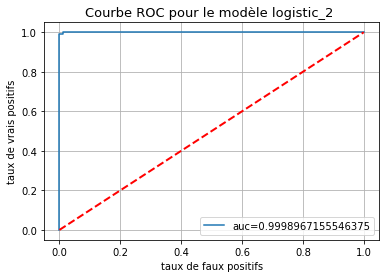

In [97]:
#Affichage de la courbe de ROC (Receiver Operating Characteristic) et de son indice AUC (Area Under the Curve)

y_pred_proba = logistic_2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_2 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_2))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
plt.ylabel('taux de vrais positifs')
plt.xlabel('taux de faux positifs')
plt.title('Courbe ROC pour le modèle logistic_2 ', fontsize=13)
plt.grid()
plt.legend(loc=4)
plt.savefig("ROC_2.png", bbox_inches='tight')
plt.show()

AUC > 0,9 = Discrimination exceptionnelle

In [98]:
#class_report_2 = metrics.classification_report(data_lr_2['is_genuine'],data_lr_2['prediction2'])
#conf_matrix_2 = confusion_matrix(data_lr_2['is_genuine'],data_lr_2['prediction2'])
acc_2 = accuracy_score(data_lr_2['is_genuine'],data_lr_2['prediction2'])

In [99]:
#results.append(("logistic_2",class_report_2, conf_matrix_2, acc_2))
results.append(("logistic_2",acc_2,auc_2))

### Modele 3

In [100]:
data_lr_3=data.reset_index()

In [101]:
#Sélection des variables pour le modèle 3 ( sans les variables 'height_right' et 'height_left')
features_3= ['diagonal', 'margin_low','margin_up', 'length']

In [102]:
#les variables explicatives sont stockées dans x
X=data_lr_3[features_3]

In [103]:
#la cible est stockée dans y
y = data_lr_3['is_genuine']

In [104]:
#séparer le jeu de données en training set et testing set (80 % de données d'entraînement et 20 % de données de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [105]:
#création du model
logistic_3 = LogisticRegression()

In [106]:
#entrainer le model sur les données X_train,y_train
logistic_3.fit(X_train,y_train)

LogisticRegression()

In [107]:
#affichage des coefficients de notre équation
print(pd.DataFrame({"var":features_3,"coef":logistic_3.coef_ [0]}))

          var      coef
0    diagonal -2.108303
1  margin_low -4.057394
2   margin_up -4.008911
3      length  3.505419


In [108]:
#coeff supplémentaire 
logistic_3.intercept_

array([-0.05528394])

In [109]:
y_pred = logistic_3.predict(X_test)

In [110]:
probabilites_3 = logistic_3.predict_proba(X_test)

In [111]:
#1ère colonne proba que ce soit faux, 2ème colonne vrai
#affichage des 5 premières valeurs
print(probabilites_3 [:5,:])

[[9.99686862e-01 3.13138425e-04]
 [2.31743972e-01 7.68256028e-01]
 [8.93104217e-01 1.06895783e-01]
 [6.17658703e-01 3.82341297e-01]
 [9.66736115e-01 3.32638846e-02]]


In [112]:
#rapport sur la qualité de prédiction
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98       105
        True       0.98      1.00      0.99       195

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [113]:
#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred))

[[101   4]
 [  0 195]]


In [114]:
#taux d'erreur
(124/300)
print("Taux d'erreur de ",round((1/300)*100,2),'%')

Taux d'erreur de  0.33 %


In [115]:
##taux de precision 
accuracy_score(y_test,y_pred)

0.9866666666666667

In [116]:
#évaluer le model (coéfficient de détermination R carré )
logistic_3.score(X,y)

0.9866666666666667

In [117]:
#utiliser le model
logistic_3.predict(X)

array([ True,  True,  True, ..., False, False, False])

In [118]:
#création d'une colonne avec les resultat de la regréssion logistique
data_lr_3['prediction3']=logistic_3.predict(X)

In [119]:
#tri croisé entre is_genuine et prédiction3 
print("Matrice de confusion logistic_3")
pd.crosstab(data_lr_3['is_genuine'],data_lr_3['prediction3'])

Matrice de confusion logistic_3


prediction3,False,True
is_genuine,,
False,483,17
True,3,997


In [120]:
print("Modèle logistic_3")
print(" ")
print("Nombre de faux positifs = ",'15')
print("Nombre de faux négatifs = ",'4')
print("Taux d'erreur = ",round(((15+4)/1500)*100,2),'%')
print("Taux de succès = ",round((996+484)/1500*100,2),'%')
print("Sensibilité = ",round((996/(996+4))*100,2),'%')
print("Précision =  ",round((996/(996+15))*100,2),'%')
print("Spécificité = ",round((485/(15+485))*100,2),'%')

Modèle logistic_3
 
Nombre de faux positifs =  15
Nombre de faux négatifs =  4
Taux d'erreur =  1.27 %
Taux de succès =  98.67 %
Sensibilité =  99.6 %
Précision =   98.52 %
Spécificité =  97.0 %


In [121]:
#rapport sur la qualité de prédiction et la performance du modèle (nombre totale d'observation correctement predite)
print("logistic_3")
print(metrics.classification_report(data_lr_3['is_genuine'],data_lr_3['prediction3']))
print("Accuracy :",round(accuracy_score(data_lr_3['is_genuine'],data_lr_3['prediction3']),6)*100,"%")
print("Precision :",round(precision_score(data_lr_3['is_genuine'],data_lr_3['prediction3']),6)*100,"%")

logistic_3
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       500
        True       0.98      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500

Accuracy : 98.66669999999999 %
Precision : 98.3235 %


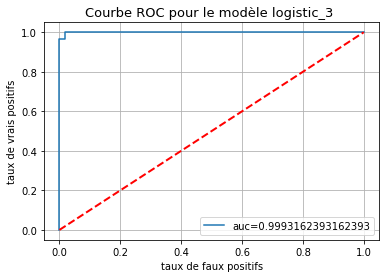

In [122]:
#Affichage de la courbe de ROC (Receiver Operating Characteristic) et de son indice AUC (Area Under the Curve)

y_pred_proba = logistic_3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_3 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_3))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
plt.ylabel('taux de vrais positifs')
plt.xlabel('taux de faux positifs')
plt.title('Courbe ROC pour le modèle logistic_3 ', fontsize=13)
plt.grid()
plt.legend(loc=4)
plt.savefig("ROC_3.png", bbox_inches='tight')
plt.show()

In [123]:
#class_report_3 = metrics.classification_report(data_lr_3['is_genuine'],data_lr_3['prediction3'])
#conf_matrix_3 = confusion_matrix(data_lr_3['is_genuine'],data_lr_3['prediction3'])
acc_3 = accuracy_score(data_lr_3['is_genuine'],data_lr_3['prediction3'])

In [124]:
#results.append(("logistic_3",class_report_3, conf_matrix_3, acc_3))
results.append(("logistic_3",acc_3,auc_3))

### Modele 4

In [125]:
data_lr_4=data.reset_index()

In [126]:
#Sélection des variables pour le modèle 4 ( sans les variables 'height_right' et 'height_left' et 'digonal')
features_4= ['margin_low','margin_up', 'length']

In [127]:
#les variables explicatives sont stockées dans X
X=data_lr_4[features_4]

In [128]:
#la cible est stockée dans y
y = data_lr_4['is_genuine']

In [129]:
#séparer le jeu de données en training set et testing set (80 % de données d'entraînement et 20 % de données de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [130]:
#Définir le modèle (Regression Logistique)
logistic_4 = LogisticRegression()

In [131]:
#entrainer le modèle sur les données X_train,y_train
logistic_4.fit(X_train,y_train)

LogisticRegression()

In [132]:
#affichage des coefficients de notre équation / coefficient de régression / poids de chaque variable indépendante 
print(pd.DataFrame({"var":features_4,"coef":logistic_4.coef_ [0]}))

          var      coef
0  margin_low -3.885158
1   margin_up -3.525685
2      length  4.004789


In [133]:
#coeff supplémentaire Independent term in the linear model
logistic_4.intercept_

array([-421.25917652])

In [134]:
#utiliser le modèle sur les données test
y_pred = logistic_4.predict(X_test)

In [135]:
probabilites_4 = logistic_4.predict_proba(X_test)

In [136]:
#1ère colonne proba que ce soit faux, 2ème colonne vrai
#affichage des 5 premières valeurs
print(probabilites_4 [:5,:])

[[9.81654550e-01 1.83454501e-02]
 [5.81175221e-04 9.99418825e-01]
 [9.99864906e-01 1.35093708e-04]
 [1.91833369e-04 9.99808167e-01]
 [4.51987003e-03 9.95480130e-01]]


In [137]:
#rapport sur la qualité de prédiction
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99        90
        True       0.99      1.00      1.00       210

    accuracy                           0.99       300
   macro avg       1.00      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [138]:
#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred))

[[ 88   2]
 [  0 210]]


In [139]:
#taux d'erreur
(1/300)

0.0033333333333333335

In [140]:
##taux de precision 
accuracy_score(y_test,y_pred)

0.9933333333333333

In [141]:
#évaluer le modèle 
logistic_4.score(X,y)

0.9906666666666667

In [142]:
#utiliser le modèle sur mes données
logistic_4.predict(X)

array([ True,  True,  True, ..., False, False, False])

In [143]:
#création d'une colonne avec les resultat de la regréssion logistique
data_lr_4['prediction4']=logistic_4.predict(X)

In [144]:
#matrice de confusion entre is_genuine et prédiction4 
print("Matrice de confusion logistic_4")
pd.crosstab(data_lr_4['is_genuine'],data_lr_4['prediction4'])

Matrice de confusion logistic_4


prediction4,False,True
is_genuine,,
False,489,11
True,3,997


In [145]:
print("Modèle logistic_4")
print(" ")
print("Nombre de faux positifs = ",'10','(individus classés positifs et qui sont réalité des négatifs)')
print("Nombre de faux négatifs = ",'4','(individus classés négatifs et qui sont réalité des positifs )')
print("Taux d'erreur = ",round(((10+4)/1500)*100,6),'%','(nombre de mauvais classement rapporté à l\'effectif total)')
print("Taux de succès = ",round((996+490)/1500*100,6),'%','(probabilité de bon classement du modèle)')
print("Sensibilité = ",round((996/(996+4))*100,6),'%','(capacité du modèle à retrouver les positifs)')
print("Précision =  ",round((996/(996+10))*100,6),'%','(proportion de vrais positifs parmi les individus qui ont été classés positifs)')
print("Spécificité = ",round((490/(10+490))*100,6),'%','(proportion de négatifs détectés)')

Modèle logistic_4
 
Nombre de faux positifs =  10 (individus classés positifs et qui sont réalité des négatifs)
Nombre de faux négatifs =  4 (individus classés négatifs et qui sont réalité des positifs )
Taux d'erreur =  0.933333 % (nombre de mauvais classement rapporté à l'effectif total)
Taux de succès =  99.066667 % (probabilité de bon classement du modèle)
Sensibilité =  99.6 % (capacité du modèle à retrouver les positifs)
Précision =   99.005964 % (proportion de vrais positifs parmi les individus qui ont été classés positifs)
Spécificité =  98.0 % (proportion de négatifs détectés)


In [146]:
#rapport sur la qualité de prédiction et la performance du modèle (nombre totale d'observation correctement predite)
print("logistic_4")
print(metrics.classification_report(data_lr_4['is_genuine'],data_lr_4['prediction4']))
print("Accuracy :",round(accuracy_score(data_lr_4['is_genuine'],data_lr_4['prediction4']),6)*100,"%")
print("Precision :",round(precision_score(data_lr_4['is_genuine'],data_lr_4['prediction4']),6)*100,"%")

logistic_4
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       500
        True       0.99      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

Accuracy : 99.0667 %
Precision : 98.90870000000001 %


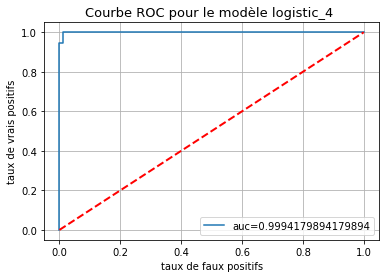

In [147]:
#évaluation de la qualité prédictive de la régression logistique à l'aide de la courbe de ROC (Receiver Operating Characteristic) et de son indice AUC (Area Under the Curve)

y_pred_proba = logistic_4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_4 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc_4))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
plt.ylabel('taux de vrais positifs')
plt.xlabel('taux de faux positifs')
plt.title('Courbe ROC pour le modèle logistic_4 ', fontsize=13)
plt.grid()
plt.legend(loc=4)
plt.savefig("ROC_4.png", bbox_inches='tight')
plt.show()

>La courbe ROC met en relation le taux de vrais positifs TVP et le taux de faux positifs TFP dans un graphique nuage de points.<p>
>La discrimination est parfaite. Tous les positifs sont situés devant les négatifs, la courbe ROC est collée aux extrémités Ouest et Nord du repère.<p>
>L'aire sous la courbe ROC , l'AUC (Area Under the Curve ), est une mesure de la qualité de la classification qui varie entre 0.5 (50% represente le hasard) dans le pire des cas et 1 dans le meilleur des cas.<p>
>Notre modèle ayant une AUC supérieure à 0.99 est excellent.<p>

In [148]:
#je stock les resultats dans une liste pour pouvoir comparer les modèles
acc_4 = accuracy_score(data_lr_4['is_genuine'],data_lr_4['prediction4'])
results.append(("logistic_4",acc_4,auc_4))

### Comparaison des différents modèles

In [149]:
labels  = []
accuracy = []
auc = []
for i in range(len(results)):
    labels.append(results[i][0])#premier element de la liste results "nom du test"
    accuracy.append(results[i][1])#deuxieme element de la liste results "accuracy_score"
    auc.append(results[i][2])#troisième element de la liste results "auc"

In [150]:
comp = pd.DataFrame({"Modèle":labels, "Accuracy":accuracy, "AUC":auc})
comp.style.set_caption("Comparaison des différents modèles")

,Modèle,Accuracy,AUC
0,logistic_1,0.989333,0.999666
1,logistic_2,0.990000,0.999897
2,logistic_3,0.986667,0.999316
3,logistic_4,0.990667,0.999418


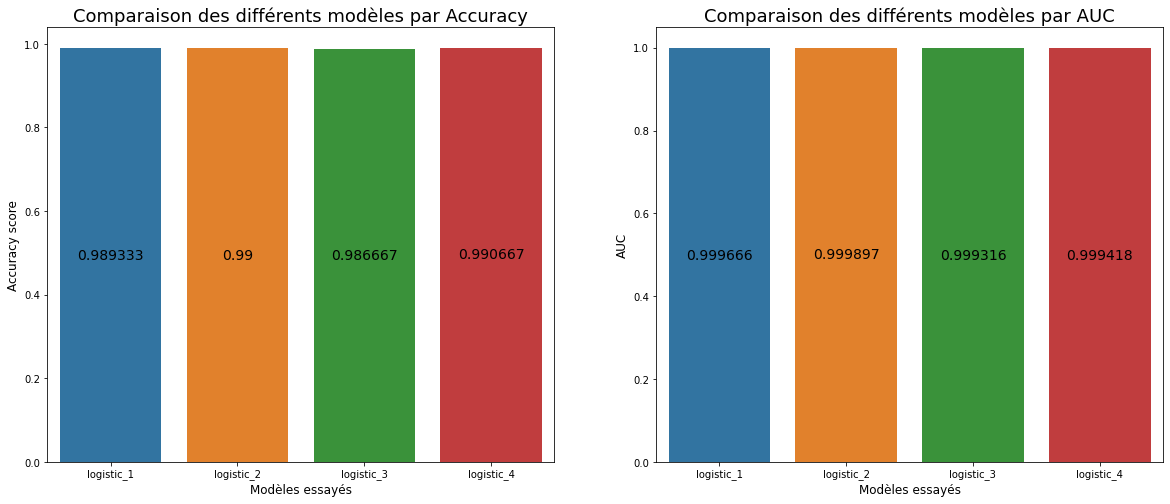

In [151]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
splot=sb.barplot(x="Modèle",y="Accuracy",data=comp)
plt.title("Comparaison des différents modèles par Accuracy", size=18)
plt.ylabel("Accuracy score", size=12)
plt.xlabel("Modèles essayés", size=12)
plt.bar_label(splot.containers[0],size=14,label_type='center')


plt.subplot(122)
splot=sb.barplot(x="Modèle",y="AUC",data=comp)
plt.title("Comparaison des différents modèles par AUC", size=18)
plt.ylabel("AUC", size=12)
plt.xlabel("Modèles essayés", size=12)
plt.bar_label(splot.containers[0],size=14,label_type='center')

plt.savefig("Comparaison des différents modèles.png", bbox_inches='tight')
plt.show()

## Test de l’algorithme en direct avec un jeu de données

In [152]:
test=pd.read_csv("billets_test.csv",sep=',')

In [153]:
test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


#### Test avec régréssion logistique

In [154]:
#Sélection des variables explicatives (modèle 4 => sans les variables 'height_right' et 'height_left' et 'digonal')
#les variables explicatives sont stockées dans X

X=test[features_4]

In [155]:
features_4

['margin_low', 'margin_up', 'length']

In [156]:
#utiliser le modèle logistic_4
prediction = logistic_4.predict(X)
prediction

array([ True, False,  True, False, False])

In [157]:
#prédictions pour chaque ID
print(pd.DataFrame({'ID':test['id'],'prediction':prediction}))

    ID  prediction
0  B_1        True
1  B_2       False
2  B_3        True
3  B_4       False
4  B_5       False


In [158]:
#création d'une colonne avec les resultat de la regréssion logistique modèle 4 sur notre fichier test
test['prediction']=prediction
test.style.set_caption("Test du modèle logistic_4 sur un jeu de données").format(precision=2).set_table_styles(styles)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,False


#### Test avec K-means

In [159]:
# Nombre de clusters souhaités
n_clust = 2

# garder les variables du modèle 4
test_k = test[['margin_low','margin_up', 'length']]

# préparation des données pour le clustering
X = test_k.values

In [160]:
#Centrage / réduction des données

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

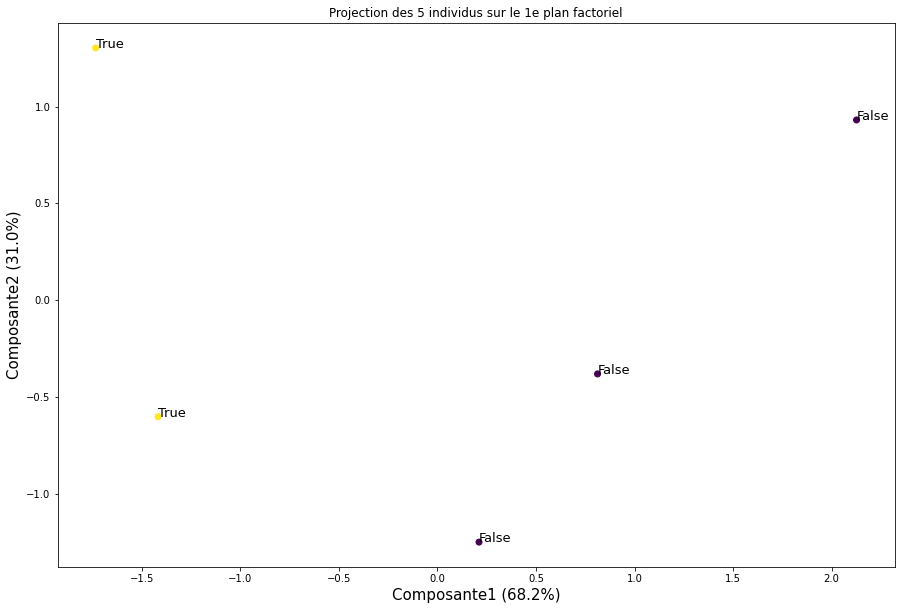

In [161]:
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)
y_kmeans = km.predict(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

plt.figure(figsize=(15, 10))

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_kmeans )
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, test['prediction'][i], fontsize='13') 


plt.xlabel('Composante{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('Composante{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.savefig("Test_Kmean_logistic_4.png", bbox_inches='tight')
plt.show(block=False)

In [162]:
#Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [163]:
print("Matrice de confusion")
mc_k = pd.crosstab(test['prediction'],clusters)
mc_k.index = ['Cluster 0','Cluster 1']
mc_k.columns = ['Faux','Vrais']
mc_k

Matrice de confusion


,Faux,Vrais
Cluster 0,3,0
Cluster 1,0,2
